## **Libraries**

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

## **Problem 3.**

El famoso pol√≠mata italiano Leonardo da Vinci (1452-1519) propuso en sus estudios anat√≥micos que existe una proporci√≥n particular en el cuerpo humano: la distancia entre los brazos extendidos horizontalmente (formando una ‚ÄúT‚Äù con el cuerpo) es aproximadamente igual a la estatura de la persona. Para verificar esta hip√≥tesis, utilizaremos datos de 1500 estudiantes del Census at school que usaron en el primer proyecto.

### *Data reading*

In [4]:
df_3 = pd.read_csv('../data/merged_data.csv')
df_3

Height_cm  Armspan_cm
0           178         186
1           158         152
2           174         174
3           176         183
4           160          66
...         ...         ...
1495        167         171
1496        193         197
1497         66          54
1498        152          61
1499        154         152

[1500 rows x 2 columns]

### *a. Realice un diagrama de dispersi√≥n (scatter plot) para visualizar la relaci√≥n entre la distancia entre brazos extendidos (eje x) y la estatura (eje y). Utilice la misma escala en ambos ejes. ¬øQu√© tipo de relaci√≥n observa entre estas variables?*

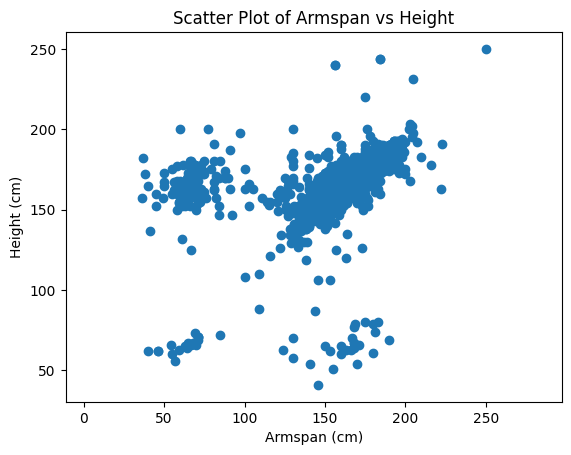

In [5]:
plt.scatter(df_3['Armspan_cm'], df_3['Height_cm'])
plt.xlabel('Armspan (cm)')
plt.ylabel('Height (cm)')
plt.title('Scatter Plot of Armspan vs Height')
plt.axis('equal')  
plt.show()

El diagrama de dispersi√≥n tiene una buena correlaci√≥n lineal positiva, que podr√≠amos enfocar a un modelo de regresi√≥n lineal. Sin embargo, puedo observar una correlaci√≥n negativa "cuadratica" como le llamo yo, es decir, que se pueda enfocar a un modelo de regresi√≥n cuadratico, teniendo como negativo el parametro a (es decir, la funci√≥n cuadratica sea negativa o apunte hacia abajo). Existen algunos datos dispersos, pero una gran mayor√≠a se concentran en los lugares objetivos (planteando que la teor√≠a de da Vinci es cierta, sobre que la longitud de brazos extendidos en "T" sea igual a la altura)

### *b. Seg√∫n la hip√≥tesis de da Vinci, ¬øqu√© valor deber√≠a tener la pendiente de la recta de regresi√≥n? Justifique su respuesta.*

El valor que tendr√≠a que mx, tomando en cuenta la formula de la pendiente de la forma y = mx+b, debe ser mx>0, o lo que es lo mismo, ser de valores positivos o tener pendiente positiva. Esto, pues vemos que la recta que m√°s puede minimizar el error (tomando como referencia las predicciones), es una recta positiva, ya que hay una mayor√≠a de datos si trazamos esa recta positiva, y la cercan√≠a de los otros datos no se ve tan comprometida, por ende no se podr√≠a perder tanta precisi√≥n con una recta positiva.

### *c. Determine la ecuaci√≥n de la recta de regresi√≥n para predecir la estatura a partir de la distancia entre brazos. Compare la pendiente obtenida con su respuesta del inciso anterior. ¬øQu√© puede concluir?*

Coeficiente (pendiente): 0.2771864348331272
T√©rmino independiente: 120.46053890408808


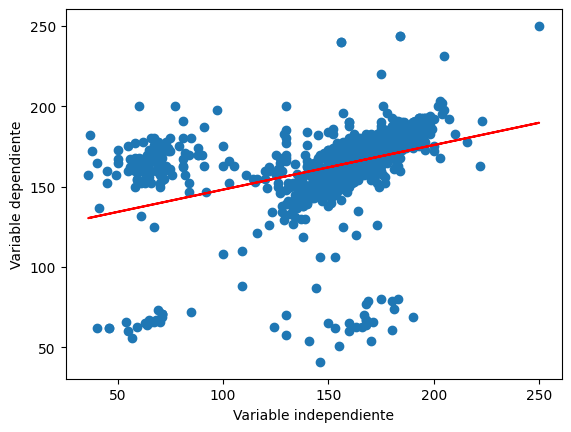

In [6]:
X = df_3['Armspan_cm'].values.reshape(-1, 1)
y = df_3['Height_cm']

modelo = LinearRegression()

modelo.fit(X, y)

predicciones = modelo.predict(X)

# Imprimir coeficiente (pendiente) y t√©rmino independiente (intercepto)
print("Coeficiente (pendiente):", modelo.coef_[0])
print("T√©rmino independiente:", modelo.intercept_)

plt.scatter(df_3['Armspan_cm'], y)
plt.plot(df_3['Armspan_cm'], predicciones, color='red')
plt.xlabel("Variable independiente")
plt.ylabel("Variable dependiente")
plt.show()

El modelo de regresi√≥n l√≠neal m√°s apr√≥ximado es a trav√©s de una funci√≥n con pendiente positiva, tal como lo dije anteriormente. Esto significa, para concluir, que s√≠ hay una buena mayor√≠a de datos apuntando a una pendiente positiva.

### *d. Para una persona con una distancia entre brazos de 65 pulgadas (165,1 c√©ntimetros): ¬øCu√°l ser√≠a su estatura predicha? ¬øCu√°l es el error est√°ndar de esta predicci√≥n? Construya un intervalo de predicci√≥n del 95% para esta estatura.*

In [7]:
import numpy as np
from scipy import stats

# Given armspan in cm
armspan = 165.1

# Predict the height
predicted_height = modelo.predict(np.array([[armspan]]))[0]

n = len(X)
mean_x = np.mean(X)
se = np.sqrt(np.sum((y - predicciones) ** 2) / (n - 2)) / np.sqrt(np.sum((X - mean_x) ** 2))

t_value = stats.t.ppf(0.975, df=n-2)
margin_of_error = t_value * se
lower_bound = predicted_height - margin_of_error
upper_bound = predicted_height + margin_of_error

print(f"Predicted height: {predicted_height:.2f} cm")
print(f"Standard error: {se:.2f}")
print(f"95% prediction interval: [{lower_bound:.2f}, {upper_bound:.2f}] cm")

Predicted height: 166.22 cm
Standard error: 0.02
95% prediction interval: [166.19, 166.26] cm


Explicaci√≥n de la formula utilizada:
* El t_value: Es el estadistico de prueba. Recordemos que los grados de libertad se encuentran de la forma n-1, sin embargo, cuando aplicamos la funci√≥n len de python, siempre nos da la dimensi√≥n de un vector + 1, en ese caso debemos quitar ese 1, por eso ese n-2. Tambi√©n se el 0.975 recordemos que viene del intervalo de predicci√≥n, cuando realizamos 1-0.95=0.5 y ese 0.5 lo partimos para el estadistico en 2.5 para cada "cola".

Si bien el modelo predice de una persona que tiene una distancia entre brazos de 65 pulgadas (165,1 c√©ntimetros) es que tiene de largo una altura de 65,4 pulgadas (166,2 c√©ntrimetros).
Como conclusi√≥n, se puede mencionar con un 95% de predicci√≥n, que para una persona que tiene una distancia entre brazos de 65 pulgadas tiene una altura en un intervalo de 65,4 pulgadas (166,19 c√©ntrimetros) y 65,5 pulgadas (166,26 c√©ntrimetros).

### *e. Realice un an√°lisis de residuos: Grafique los residuos vs valores ajustados ¬øSe cumplen los supuestos de linealidad y homocedasticidad? Identifique posibles valores at√≠picos o influyentes.*

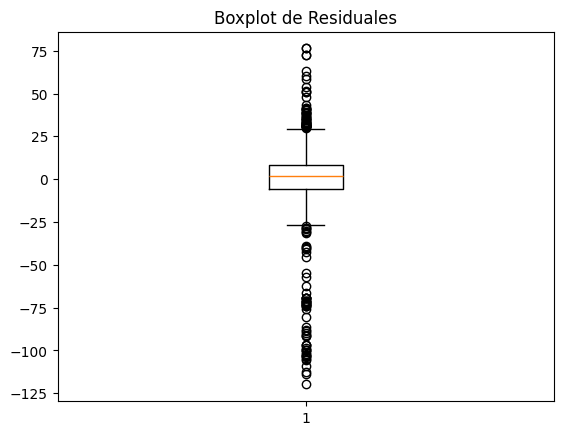

In [8]:
residuals = y - predicciones

plt.scatter(predicciones, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuales')
plt.title('Residuales vs Valores Ajustados')
plt.show()

# Boxplot of residuals
plt.boxplot(residuals)
plt.title('Boxplot de Residuales')
plt.show()

En la gr√°fica, los puntos parecen estar bastante dispersos, sin un patr√≥n muy evidente en forma de curva. Esto puede sugerir que, en general, el modelo est√° capturando bien una relaci√≥n lineal. Sin embargo, puedo notar que en algunas √°reas donde los puntos est√°n m√°s agrupados, lo cual podr√≠a ser una indicaci√≥n de que ciertos subconjuntos de datos est√°n influyendo de manera diferente. Aunque esto no es un incumplimiento grave del supuesto de linealidad, puede sugerir que podr√≠amos estar perdiendo algo de informaci√≥n que tal vez un modelo un poco m√°s complejo capturar√≠a mejor.

En cuanto a la homocedasticidad, observando la gr√°fica, parece que en algunos lugares la dispersi√≥n de los puntos (los residuales) es mayor. Por ejemplo, en los extremos de los valores ajustados, algunos puntos parecen alejarse mucho m√°s de la l√≠nea roja (que representa un error de cero) que en otras √°reas. Esto puede indicar que el modelo tiene problemas para predecir bien en esos rangos y que los errores no son uniformes en toda la gr√°fica. En t√©rminos sencillos (que podr√≠a decir yo), significa que el modelo podr√≠a estar haciendo un mejor trabajo en algunas partes del rango de valores y un trabajo menos preciso en otras, lo cual es una se√±al de que el supuesto de homocedasticidad podr√≠a no estarse cumpliendo completamente.

Algunos puntos en la gr√°fica se encuentran muy lejos de la l√≠nea de cero, especialmente aquellos con residuales mayores a 25 o menores a -50.
Estos valores at√≠picos son importantes porque podr√≠an estar influyendo en el ajuste del modelo. A veces, estos puntos extremos pueden ‚Äúempujar‚Äù la l√≠nea de regresi√≥n en una direcci√≥n que no representa bien la mayor√≠a de los datos. Si estos valores at√≠picos se deben a errores en los datos (por ejemplo, un error de entrada), ser√≠a mejor eliminarlos o corregirlos. Si son datos v√°lidos, podr√≠a considerar yo, puede ser √∫til considerar un modelo que trate de una mejor manera estos casos extremos, ya que est√°n afectando los resultados.

### *f. Pruebe la existencia de una relaci√≥n lineal entre las variables: Plantee las hip√≥tesis nula y alternativa. Use Œ± = 0,05. Interprete el resultado en el contexto del problema.*

In [10]:
# Agregar constante para el t√©rmino independiente
X_with_constant = sm.add_constant(X)

# Ajustar el modelo
modelo_stats = sm.OLS(y, X_with_constant).fit()

# Resumen del modelo que incluye el p-valor
print(modelo_stats.summary())

                            OLS Regression Results                            
Dep. Variable:              Height_cm   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     278.7
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           1.64e-57
Time:                        17:26:49   Log-Likelihood:                -6663.5
No. Observations:                1500   AIC:                         1.333e+04
Df Residuals:                    1498   BIC:                         1.334e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        120.4605      2.654     45.385      0.0

Paso 1: Hip√≥tesis
Hip√≥tesis Nula (H‚ÇÄ): No existe una relaci√≥n lineal entre la envergadura (Armspan) y la altura (Height), es decir, el coeficiente de la envergadura es igual a cero (ùõΩ=0).
Hip√≥tesis Alternativa (H‚ÇÅ): Existe una relaci√≥n lineal significativa entre la envergadura y la altura, es decir, el coeficiente de la envergadura es diferente de cero (ùõΩ‚â†0).

Paso 2: Nivel de Significancia
Se ha establecido un nivel de significancia de ùõº=0.05.

Paso 3: Resultados de la Prueba
Coeficiente de la envergadura (x1): El coeficiente es 0.2772, lo que significa que, en promedio, por cada cent√≠metro adicional en la envergadura, se espera que la altura aumente en aproximadamente 0.277 cm.
Valor p asociado al coeficiente: El valor p para este coeficiente es 0.000 (en realidad, es menor que cualquier valor reportable), lo cual es mucho menor que 0.05.
F-statistic y su p-valor: El estad√≠stico F es 278.7, con un valor p de 1.64e-57 (un n√∫mero extremadamente bajo).

Conclusi√≥n
Dado que el p-valor del coeficiente de la envergadura es menor que 0.05, **rechazamos la hip√≥tesis nula**. Esto significa que tenemos evidencia estad√≠stica suficiente para afirmar que existe una relaci√≥n lineal significativa entre la envergadura y la altura en estos datos, con un nivel de confianza del 95%.

En t√©rminos pr√°cticos, esto sugiere que la envergadura puede ser un predictor √∫til de la altura en esta muestra de datos, por lo menos en el intervalo que definimos.

### *g. Para la pendiente de la recta de regresi√≥n: Construya un intervalo de confianza del 95% ¬øEste intervalo contiene el valor te√≥rico seg√∫n la hip√≥tesis de da Vinci? ¬øQu√© implica esto sobre la validez de la hip√≥tesis?*

Leonardo da Vinci propuso que la relaci√≥n entre la envergadura de una persona y su altura es aproximadamente de 1:1, es decir, la pendiente de una l√≠nea que relacione estas dos variables deber√≠a ser cercana a **1**, tomando en cuenta un analisis de "correlaci√≥n".

Para verificar esta hip√≥tesis, construimos un intervalo de confianza al 95% para la pendiente en nuestro modelo de regresi√≥n. A partir del resumen del modelo, sabemos que:
- La pendiente estimada es **0.2772**.
- El error est√°ndar de esta pendiente es **0.017**.

Para calcular el intervalo de confianza, utilizamos esta f√≥rmula:

Intervalo¬†de¬†confianza = pendiente¬†estimada ¬± t_Œ±/2 √ó error¬†est√°ndar

Aplicando la formula a nuestros datos ser√≠a:

Intervalo¬†de¬†confianza=0.2772¬±1.96√ó0.017

Lo anterior da como resultado:

\[
Intervalo de confianza = [0.24388, 0.31052]
\]

El intervalo de confianza del 95% para la pendiente es **[0.24388, 0.31052]**. Este intervalo **no contiene el valor 1** que la hip√≥tesis de da Vinci sugiere.

La hip√≥tesis de da Vinci propone que la envergadura y la altura deber√≠an estar en una proporci√≥n de 1:1 (pendiente = 1). Sin embargo, el intervalo de confianza calculado nos indica que la pendiente real en nuestros datos est√° lejos de 1.

Esto implica que, en este conjunto de datos, **la hip√≥tesis de da Vinci no se sostiene**. En otras palabras, la envergadura no es un predictor perfecto de la altura en una relaci√≥n 1:1.


### *h. Calcule e interprete: El coeficiente de correlaci√≥n r. El coeficiente de determinaci√≥n R^2. ¬øQu√© nos dicen estos valores sobre la fortaleza de la relaci√≥n?*

In [13]:
r_squared = r2_score(y, predicciones)

r = np.sqrt(r_squared)

print(f"Coeficiente de correlaci√≥n (r): {r:.4f}")
print(f"Coeficiente de determinaci√≥n (R^2): {r_squared:.4f}")

Coeficiente de correlaci√≥n (r): 0.3961
Coeficiente de determinaci√≥n (R^2): 0.1569


Podemos observar que, la distancia entre los brazos extendidos horizontalmente (formando una ‚ÄúT‚Äù con el cuerpo) es aproximadamente igual a la estatura de la persona **NO** tiene buena correlaci√≥n, es decir, la relaci√≥n no es tan fuerte (seg√∫n el coeficiente de correlaci√≥n r). Tambi√©n, seg√∫n el Coeficiente de determinaci√≥n R^2 nos dice que apr√≥ximadamente el 39.61% de la altura de las personas se debe a la distancia entre los brazos extendidos horizontalmente (formando una ‚ÄúT‚Äù con el cuerpo). 

Como conclusi√≥n, lo anterior quiere decir que el modelo no puede predecir de forma precisa la estatura de una persona a partir de la distancia entre los brazos extendidos de esa persona.

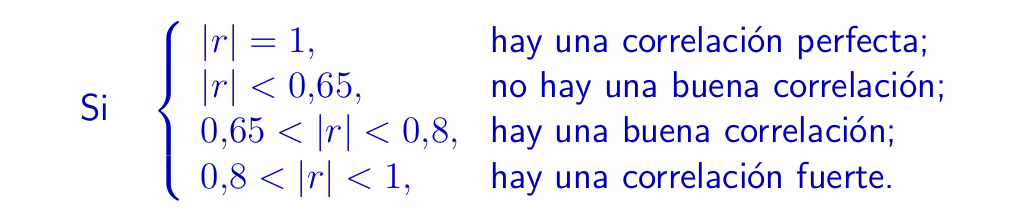